In [72]:
import warnings
warnings.filterwarnings(action='ignore')

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [74]:
df = pd.read_csv('../airline-passengers.csv',parse_dates=['Month'],index_col=['Month'])
ts = df['Passengers']

In [75]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

<Axes: xlabel='Month'>

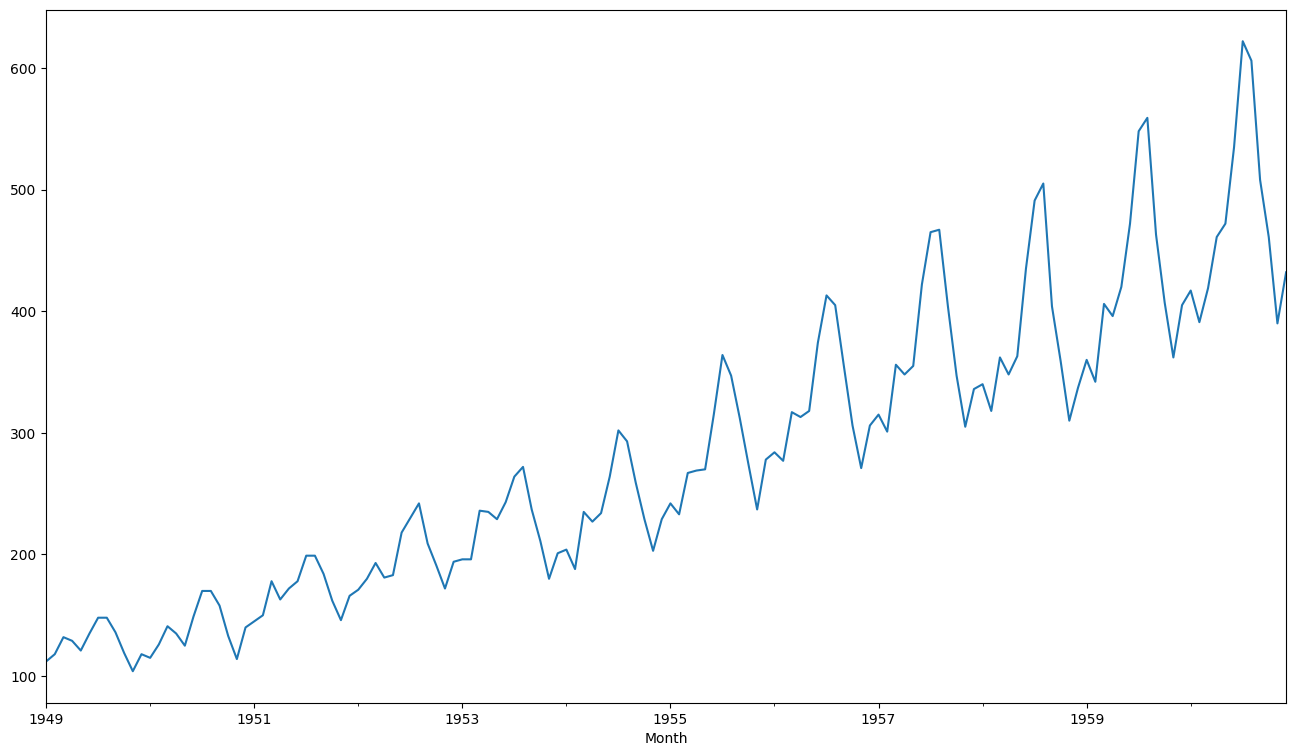

In [76]:
ts.plot(figsize=(16,9))

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



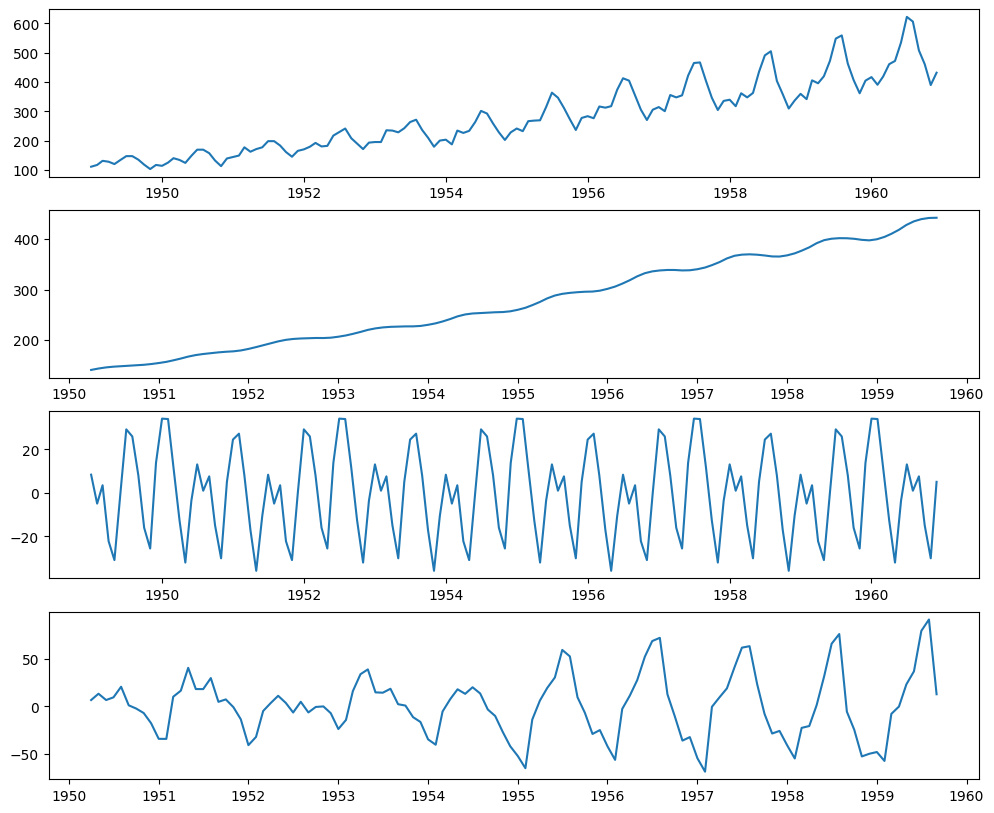

In [85]:
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(ts)
plt.subplot(412)
plt.plot(trend)
plt.subplot(413)
plt.plot(seasonal)
plt.subplot(414)
plt.plot(residual)

In [77]:
model = ARIMA(ts, order=(12,1,12))  # Use the order from auto_arima
results = model.fit()

In [78]:
forecast = results.forecast(steps = 24)

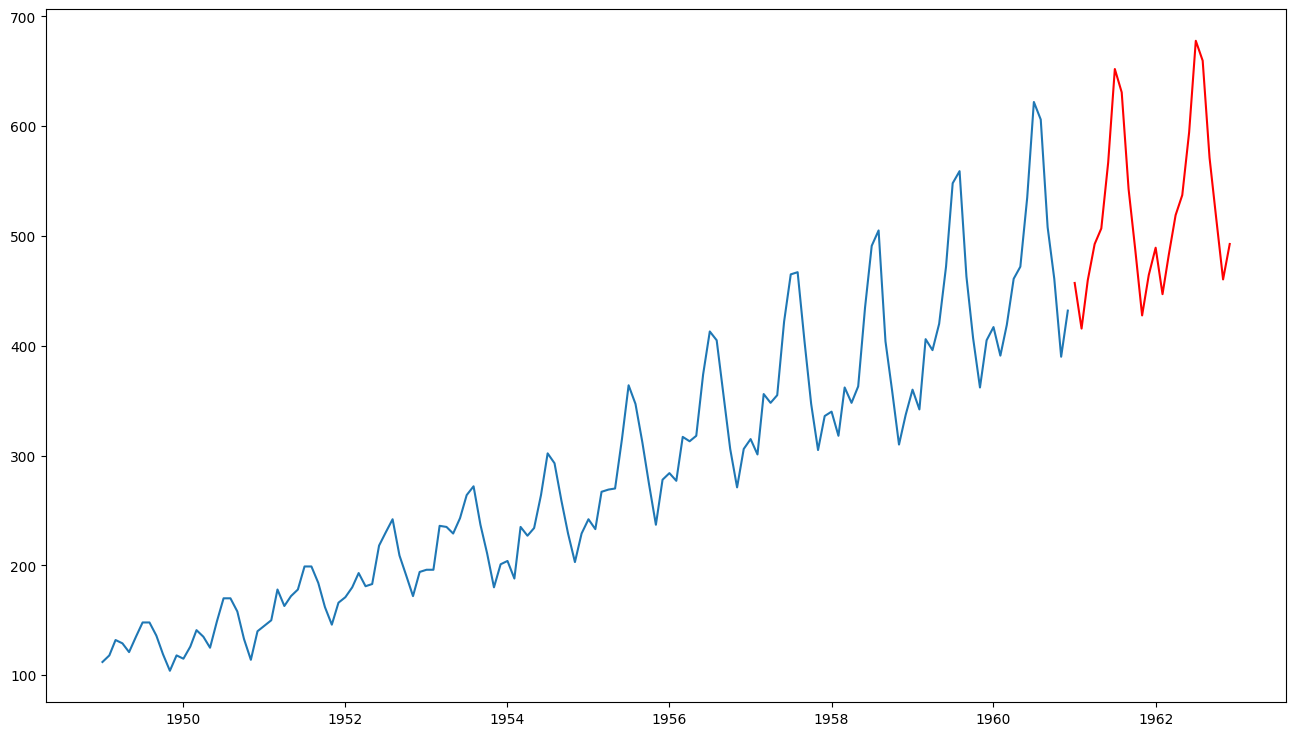

In [80]:
plt.figure(figsize=(16,9))
plt.plot(ts)
plt.plot(forecast,color='red')

In [28]:
temp = pd.read_csv('../daily-minimum-temperatures.csv')

In [30]:
temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [31]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [32]:
temp['Date'] = pd.to_datetime(temp['Date'])

In [52]:
df1 = pd.read_csv('../daily-minimum-temperatures.csv',parse_dates=['Date'],index_col=['Date'])
ts1 = df1['Temp']

<Axes: xlabel='Date'>

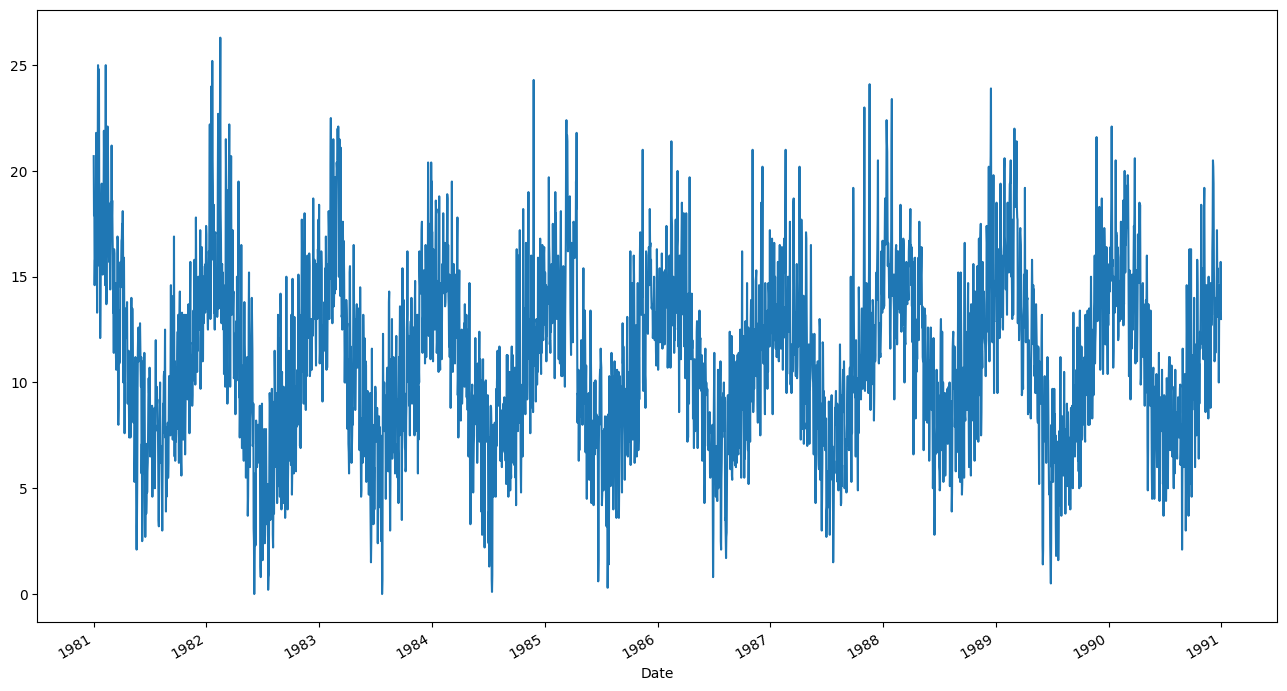

In [53]:
ts1.plot(figsize=(16,9))

In [54]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(df1 ,order = (0,2,3))
model1 = model1.fit()

/home/tejas/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/tejas/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/tejas/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/tejas/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters

In [56]:
forecast1 = model1.forecast(step=24)

/home/tejas/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/tejas/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/tejas/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['step']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


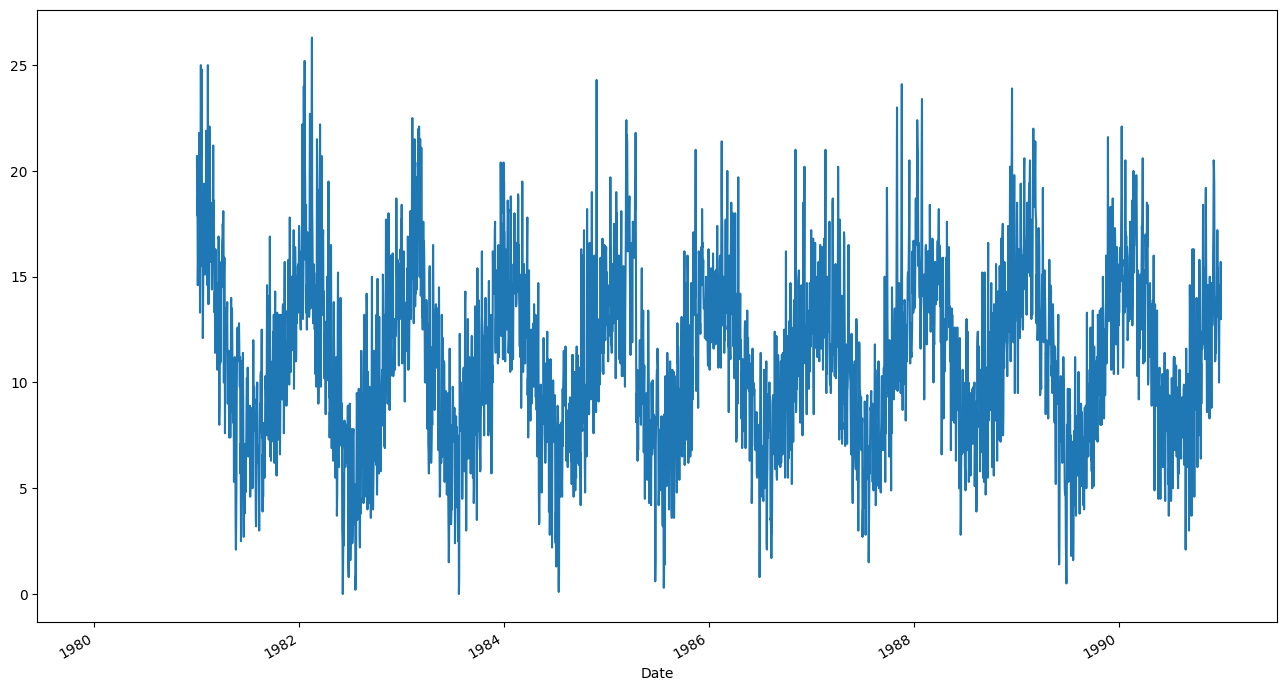

In [57]:
ts1.plot(figsize=(16,9))
plt.plot(forecast1,color='red')